# <center><font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font></center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###

## <b><font color='red'>     NOTE: This IPython notebook should be read alonside the corresponding chapter in the book, where each piece of code is fully explained.     </font></b> <br>

# <center>Chapter 5. SciPy for Signal Processing</center>

>[Image processing: scipy.ndimage](https://scipy-lectures.github.io/intro/scipy.html#image-processing-scipy-ndimage)

>[Signal processing: scipy.signal](https://scipy-lectures.github.io/intro/scipy.html#signal-processing-scipy-signal)

##Summary##

In this chapter we explore signal processing (any dimensional) including the treatment of signals in frequency space, by means of their Discrete Fourier Transforms. These correspond to the fftpack, signal, and ndimage modules.

##Discrete Fourier Transforms##

>[Discrete Fourier transforms](http://docs.scipy.org/doc/scipy-0.14.0/reference/fftpack.html)

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)

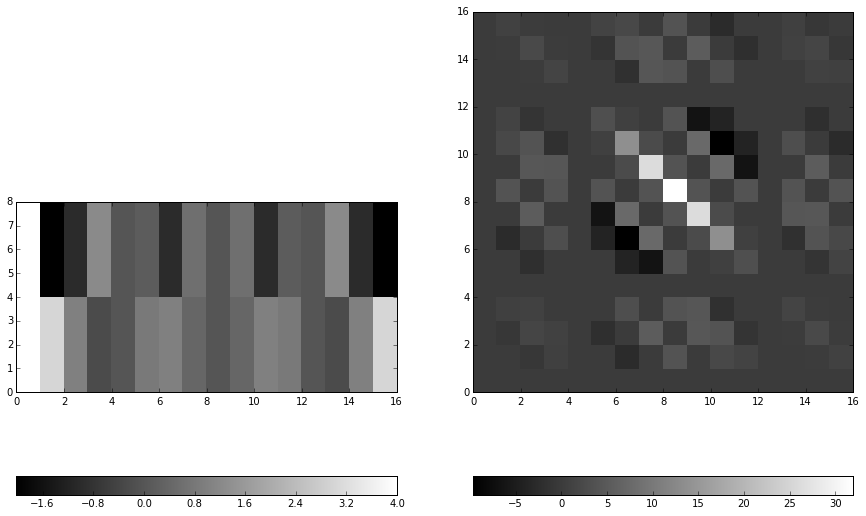

In [2]:
import numpy
from scipy.fftpack import fft,fft2, fftshift
import matplotlib.pyplot as plt
B=numpy.ones((4,4)); W=numpy.zeros((4,4))
signal = numpy.bmat("B,W;W,B")
onedimfft = fft(signal,n=16)
twodimfft = fft2(signal,shape=(16,16))
plt.figure()
plt.gray()
plt.subplot(121,aspect='equal')
plt.pcolormesh(onedimfft.real)
plt.colorbar(orientation='horizontal')
plt.subplot(122,aspect='equal')
plt.pcolormesh(fftshift(twodimfft.real))
plt.colorbar(orientation='horizontal')
plt.show()

## Signal construction

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

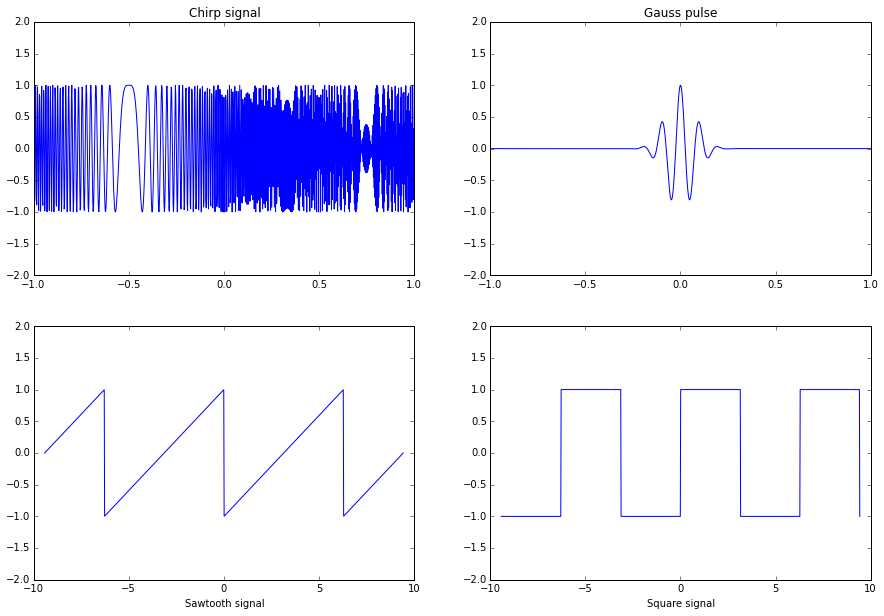

In [3]:
import numpy
from scipy.signal import chirp, sawtooth, square, gausspulse
import matplotlib.pyplot as plt
t=numpy.linspace(-1,1,1000)
plt.subplot(221); plt.ylim([-2,2])
plt.plot(t,chirp(t,f0=100,t1=0.5,f1=200))   # plot a chirp
plt.title("Chirp signal")
plt.subplot(222); plt.ylim([-2,2])
plt.plot(t,gausspulse(t,fc=10,bw=0.5))      # Gauss pulse
plt.title("Gauss pulse")
plt.subplot(223); plt.ylim([-2,2])
t*=3*numpy.pi
plt.plot(t,sawtooth(t))                     # sawtooth
plt.xlabel("Sawtooth signal")
plt.subplot(224); plt.ylim([-2,2])
plt.plot(t,square(t))                       # Square wave
plt.xlabel("Square signal")
plt.show()

## Filters

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

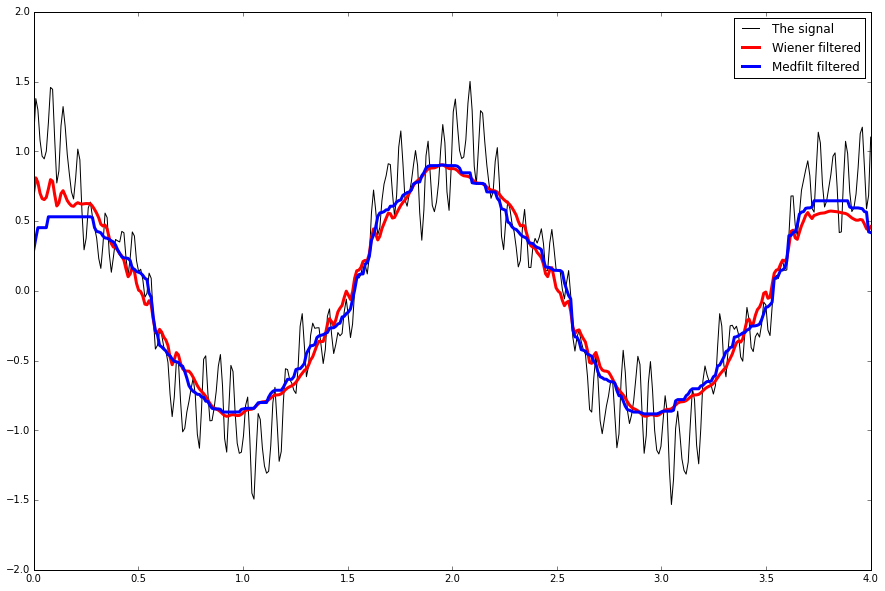

In [4]:
from numpy import sin, cos, pi, linspace
f=lambda t: cos(pi*t) + 0.2*sin(5*pi*t+0.1) + 0.2*sin(30*pi*t) + \
            0.1*sin(32*pi*t+0.1) + 0.1*sin(47* pi*t+0.8)
t=linspace(0,4,400) 
signal=f(t)
from scipy.signal import wiener, medfilt
import matplotlib.pylab as plt
plt.plot(t,signal,'k', label='The signal')
plt.plot(t,wiener(signal,mysize=55),'r',linewidth=3, label='Wiener filtered')
plt.plot(t,medfilt(signal,kernel_size=55),'b',linewidth=3, label='Medfilt filtered')
plt.legend()
plt.show()

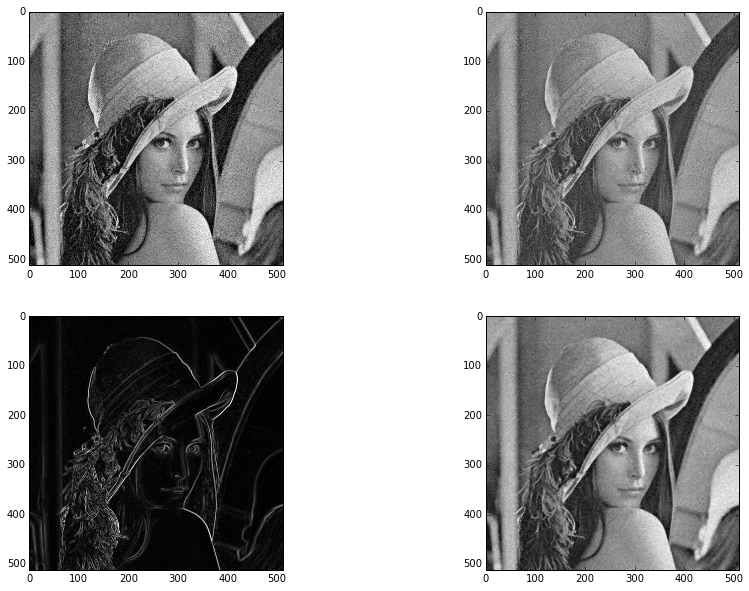

In [5]:
from scipy.stats import norm     # Gaussian distribution
import matplotlib.pyplot as plt
import scipy.misc
import scipy.ndimage
plt.gray()
lena=scipy.misc.lena().astype(float)
plt.subplot(221);
plt.imshow(lena)
lena+=norm(loc=0,scale=16).rvs(lena.shape)
plt.subplot(222);
plt.imshow(lena)
denoised_lena = scipy.ndimage.median_filter(lena,3)
plt.subplot(224); 
plt.imshow(denoised_lena)
from scipy.ndimage.filters import sobel
import numpy
lena=scipy.misc.lena()
sblX=sobel(lena,axis=0); sblY=sobel(lena,axis=1)
sbl=numpy.hypot(sblX,sblY)
plt.subplot(223); 
plt.imshow(sbl) 
plt.show()

## LTI system theory

>[scipy.signal.lti](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.lti.html)

>[Signal processing](http://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html)

>[scipy.signal.cont2discrete](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.cont2discrete.html)

>[Multi-dimensional image processing](http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html)

## Filter design

>[Signal processing](http://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html)

>[scipy.signal.cont2discrete](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.cont2discrete.html)

>[Multi-dimensional image processing](http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html)

## Window functions

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

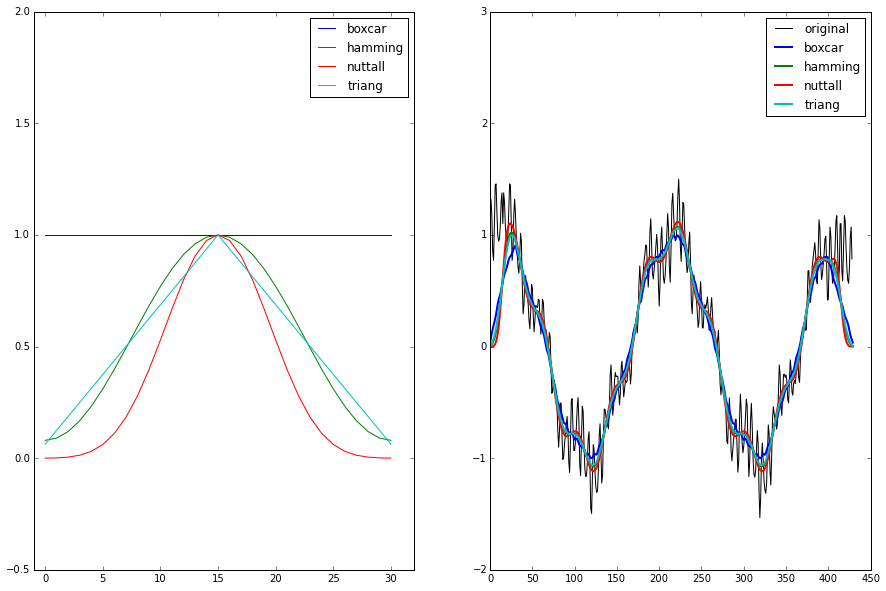

In [6]:
from scipy.signal import boxcar, hamming, nuttall, triang
import matplotlib.pylab as plt
windows=['boxcar', 'hamming', 'nuttall', 'triang']
plt.subplot(121)
for w in windows:
     eval( 'plt.plot(' + w + '(31))' )
     plt.ylim([-0.5,2]); plt.xlim([-1,32])
     plt.legend(windows)
plt.subplot(122) 
import numpy 
from numpy import sin, cos, pi, linspace 
f=lambda t: cos(pi*t) + 0.2*sin(5*pi*t+0.1) + 0.2*sin(30*pi*t) + \
            0.1*sin(32*pi*t+0.1) + 0.1*sin(47* pi*t+0.8) 
t=linspace(0,4,400); signal=f(t) 
extended_signal=numpy.r_[signal[15:0:-1],signal,signal[-1:-15:-1]]
plt.plot(extended_signal,'k')
for w in windows:
    window = eval( w+'(31)')
    output=numpy.convolve(window/window.sum(),signal)
    plt.plot(output,linewidth=2)
    plt.ylim([-2,3]); plt.legend(['original']+windows)
plt.show()

## Image interpolation

<b>Interpolation scipy.ndimage.interpolation</b>
<br>
<http://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html#module-scipy.ndimage.interpolation>
<br>
<br>
<font color=red><b>The meaning of the following equations is fully explained on the corresponding section for this chapter in the book</b></font>

## $$  \boxed{ L(x,y)=\begin{align} \underbrace{ \begin{pmatrix} a_{11} & a_{12}    \\ a_{21} & a_{22} \end{pmatrix}}_\text{A} & \begin{pmatrix} x    \\ y   \end{pmatrix}  +  \underbrace{ \begin{pmatrix} b_1    \\ b_2   \end{pmatrix}}_\text{b} \end{align} }$$

## $$ \boxed{ \begin{equation} f(z) = \frac{a z + b}{c z + d}  \end{equation} }$$

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

In [7]:
def f(z):
    temp = a*(z[0]+1j*z[1]) + b
    temp /= c*(z[0]+1j*z[1])+d
    return (temp.real, temp.imag)

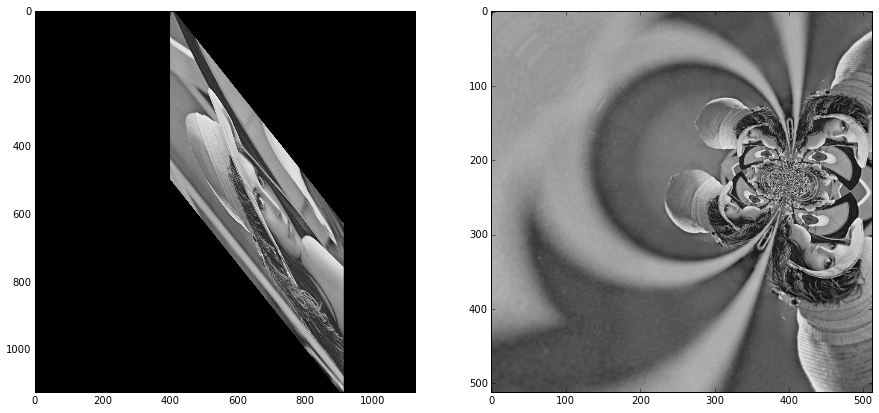

In [8]:
import scipy.misc 
import numpy 
import matplotlib.pylab as plt 
from scipy.ndimage.interpolation import affine_transform 
lena=scipy.misc.lena() 
A=numpy.mat("0,1;-1,1.25"); b=[-400,0]
Ab_Lena=affine_transform(lena,A,b,output_shape=(512*2.2,512*2.2))
plt.gray() 
plt.subplot(121) 
plt.imshow(Ab_Lena)
from scipy.ndimage.interpolation import geometric_transform 
a = 2**15*(1+1j); b = 0; c = -2**8*(1-1j*2); d = 2**18-1j*2**14
Moebius_Lena = geometric_transform(lena,f,mode='reflect')
plt.subplot(122); 
plt.imshow(Moebius_Lena) 
plt.show()


In [9]:
import scipy.misc 
from scipy.ndimage.interpolation import map_coordinates
lena=scipy.misc.lena().astype(float)
coordinates=[[10.5, 12.3], [11.7, 1.4]]

In [10]:
map_coordinates(lena, coordinates, order=1)

array([ 157.2 ,  157.42])

In [11]:
map_coordinates(lena, coordinates, order=2)

array([ 157.80641507,  157.6741489 ])

## Morphology

<b><font color=red>Please, check the book to get a full explanation of what is done by the following code and what its output represents</font></b>

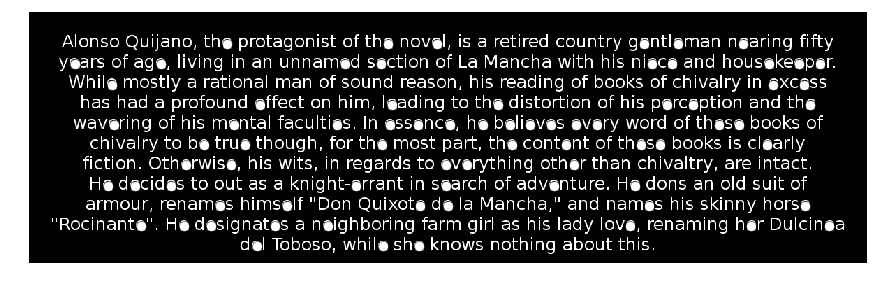

In [12]:
import numpy 
import scipy.ndimage 
import matplotlib.pylab as plt 
from scipy.ndimage.morphology import binary_hit_or_miss 
text = scipy.ndimage.imread('CHAP_05_input_textImage.png') 
letterE = text[37:53,275:291] 
HitorMiss = binary_hit_or_miss(text, structure1=letterE, origin1=1) 
eLocation = numpy.where(HitorMiss==True) 
x=eLocation[1]; y=eLocation[0] 
plt.imshow(text, cmap=plt.cm.gray, interpolation='nearest') 
plt.autoscale(False) 
plt.plot(x,y,'wo',markersize=10) 
plt.axis('off') 
plt.show() 

##  <center> This is the end of the working codes shown and thoroughly discussed in Chapter 5 of the book <font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font>
</center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###
